<h1><center>LIVERAID: A Study in Liver Diseases</center></h1>
<center> JUAN MIGUEL TRINIDAD | JONATHAN MUSNI</center>



In [1]:
#Import Required Modules
#This code imports the modules that you will need from eachi nstalled library.

# Data Manipulation Library
import pandas as pd 
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Data Preprocessing, transformation, Pipelines libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Train test split library
from sklearn.model_selection import train_test_split

# Optimization libraries
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score

# Score libraries
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

# ML sklearn libraries
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings("ignore")

### Introduction

A study was conducted by Global Burden of Disease and Institute of Health Metrics and Evaluation at the University of Washington, Seattle about the different burden of diseases(number of incidence and death) for 195 countries. One of the diseases included in the study is liver diseases such as Hepatitis B, Hepatitis C, alcohol liver disease, nonalcoholic fatty liver, and cirrhosis. The result of their study estimates that liver diseases account for 2.2 million deaths in 2017 worldwide. In addition to that, there were about one million new cases of liver cancer and 5.2 million cases of cirrhosis estimated diagnosed in 2017. 

Liver disease is the 12th cause of death in the United States based on the study by CDC in 2017 and the top cause of death for those aged 35 - 49 years old in England and Wales.

With this problem at hand, we would like to understand the different factors associated with diagnosing liver disease and create a model that would be able to help identify the possibilities of having such a disease.



### Data Overview

The dataset of interest was obtained from [Kaggle](https://www.kaggle.com/uciml/indian-liver-patient-records) which is about a collection of patient records and their chemical compound values which determines if a patient has a liver disease or not. 

| Columns                    | Data Type   |
|----------------------------|-------------|
| Age                        | Ratio     |
| Gender                     | Nominal |
| Total_Bilirubin            | Ratio            |
| Direct_Bilirubin           | Ratio            |
| Alkaline_Phosphate         | Ratio            |
| Alamine_Aminotransferate   | Ratio            |
| Aspartate_Aminotransferate | Ratio            |
| Total_Proteins             | Ratio            |
| Albumin                    | Ratio            |
| Albumin_and_Globulin_Ratio | Ratio            |
| Dataset                    | Nominal            |


### Exploratory Data Analysis
The project will include data cleaning and analysis that will help us understand each factor related to liver diseases. Given the result of the analysis that we will be doing, we would create a classification model that would predict if a person has a liver disease or not(1 = patient, 2 = not a patient)

In [2]:
try:
    liver_patient_df = pd.read_csv("data/indian_liver_patient.csv")
except FileNotFoundError:
    liver_patient_df = pd.read_csv("https://raw.githubusercontent.com/miggytrinidad/infot780-002/master/datasets_2607_4342_indian_liver_patient.csv")
liver_patient_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
liver_patient_df.Dataset.unique()

array([1, 2], dtype=int64)

The dataset target variable on "Dataset" column has a binary labels:
* "1": Liver Disease Patient
* "2": Not a Liver Disease Patient

We decided to properly label the target variables where:
* "1" represents "liver_disease_patient"
* "2" will be changed to 0 which represents "Not a Liver Disease Patient


In [4]:
# renaming mispelled column
liver_patient_df.rename(columns = {"Total_Protiens":"Total_Proteins", "Dataset": "Patient_Status"},inplace = True)

liver_patient_df["Patient_Status"].replace(2, 0,inplace=True)
liver_patient_df.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Patient_Status
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
liver_patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Proteins                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Patient_Status                583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


The target variable is the column "Liver_Patient".

Categorical Columns:
* Gender


Numerical Columns:
* Age
* Total_Bilirubin
* Direct_Bilirubin
* Alkaline_Phosphotase
* Alamine_Aminotransferase
* Total_Protiens
* Albumin
* Albumin_and_Globulin_Ratio

"Albumin_and_Globulin_Ratio" Column has a missing 4 values.

In [6]:
# dropping of missing values
liver_patient_df.dropna(inplace = True)

In [7]:
liver_patient_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,579.0,44.782383,16.221786,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,579.0,3.315371,6.227716,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,579.0,1.494128,2.816499,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,579.0,291.366149,243.561863,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,579.0,81.126079,183.182845,10.0,23.0,35.00,61.0,2000.0
Aspartate_Aminotransferase,579.0,110.414508,289.850034,10.0,25.0,42.00,87.0,4929.0
Total_Proteins,579.0,6.481693,1.084641,2.7,5.8,6.60,7.2,9.6
Albumin,579.0,3.138515,0.794435,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Patient_Status,579.0,0.715026,0.451792,0.0,0.0,1.00,1.0,1.0


Based on the pandas data frame describe function, we have a different standard deviation for the numerical attributes. This will affect the performance of the classifier. Inspecting the distribution of each attribute should be done to determine what scaler should be used for each numerical attributes.

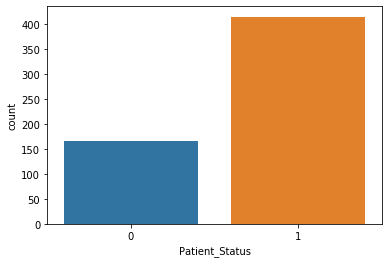

In [8]:
sns.countplot(x="Patient_Status", data=liver_patient_df)

The pie chart above illustrates that our dataset contains more liver disease patients than those who are not, which is an indication of a highly imbalanced dataset.

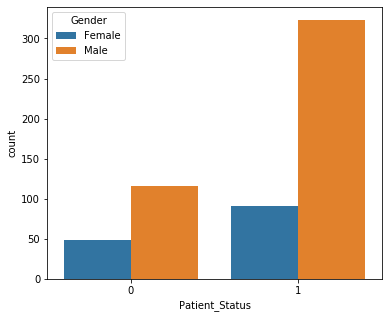

In [9]:
gender_count_plot = sns.countplot(x='Patient_Status',hue='Gender',data=liver_patient_df)
fig = plt.gcf()
fig.set_size_inches(6, 5)

The dataset contains more data related to men than women.

#### Distributions of Numerical Features

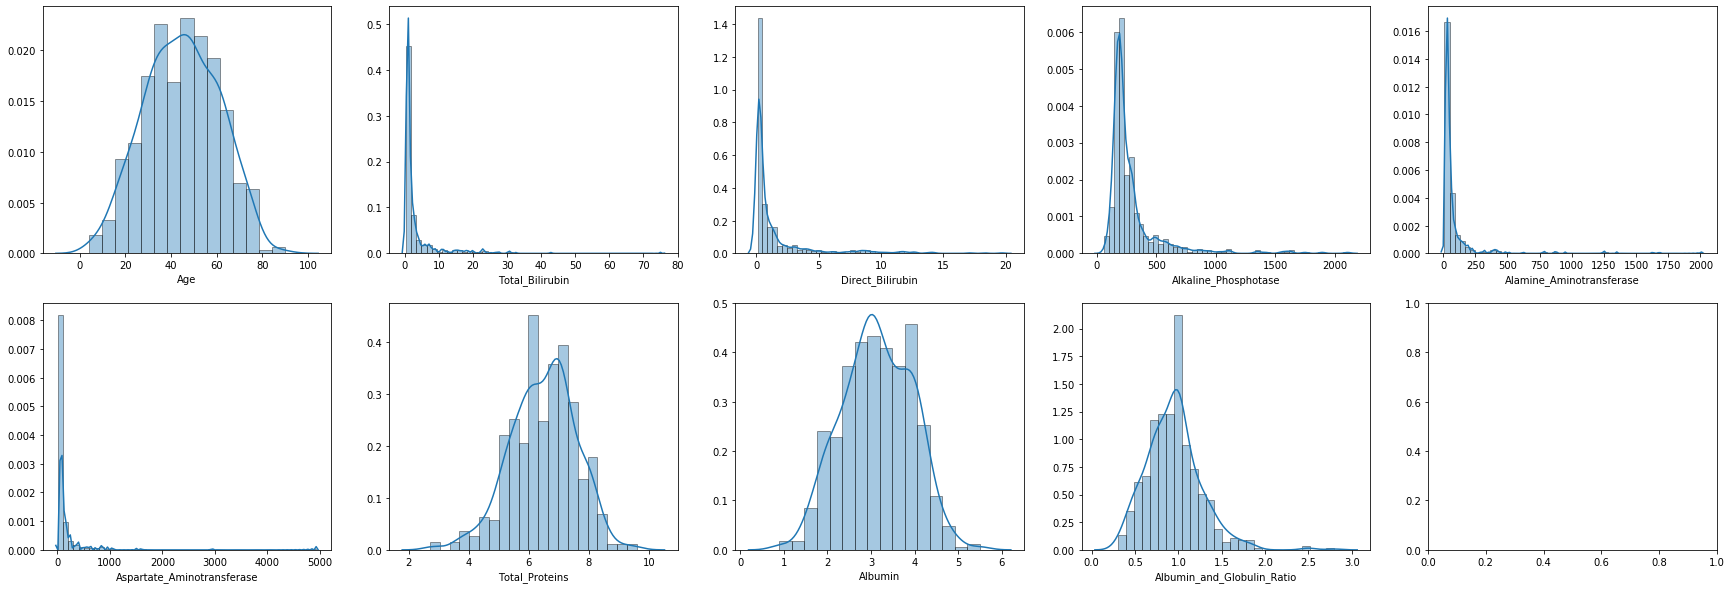

In [10]:
# sns.set(font_scale=1.2) 
# sns.set_style('darkgrid',{'axes.edgecolor': '.9'},)
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(30, 10))
plt.rcParams["patch.force_edgecolor"] = True
cols=['Age','Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase', 'Alamine_Aminotransferase',
      'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin','Albumin_and_Globulin_Ratio']

for i, ax in zip(cols, axes.flat):
    sns.distplot(liver_patient_df[i], ax=ax)
plt.show()

In [11]:
# Standard Deviation of Each numerical columns
liver_patient_df.describe().T['std']

Age                            16.221786
Total_Bilirubin                 6.227716
Direct_Bilirubin                2.816499
Alkaline_Phosphotase          243.561863
Alamine_Aminotransferase      183.182845
Aspartate_Aminotransferase    289.850034
Total_Proteins                  1.084641
Albumin                         0.794435
Albumin_and_Globulin_Ratio      0.319592
Patient_Status                  0.451792
Name: std, dtype: float64

Combining how a numerical attribute is distributed, the occurrence of outliers and its standard deviation, we can choose what scaler we will use for each attribute. Columns such as "Age", "Total_Proteins", and "Albumin", "Albumin_and_Globulin_Ratio" can use a standard scaler while 'Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase', 'Alamine_Aminotransferase','Aspartate_Aminotransferase' should use a robust scaler because of the occurrence of outliers in their right-skewed distribution, standard scaler would not work well for these columns.

### Boxplot Distribution between Liver Patient and not Liver Patient

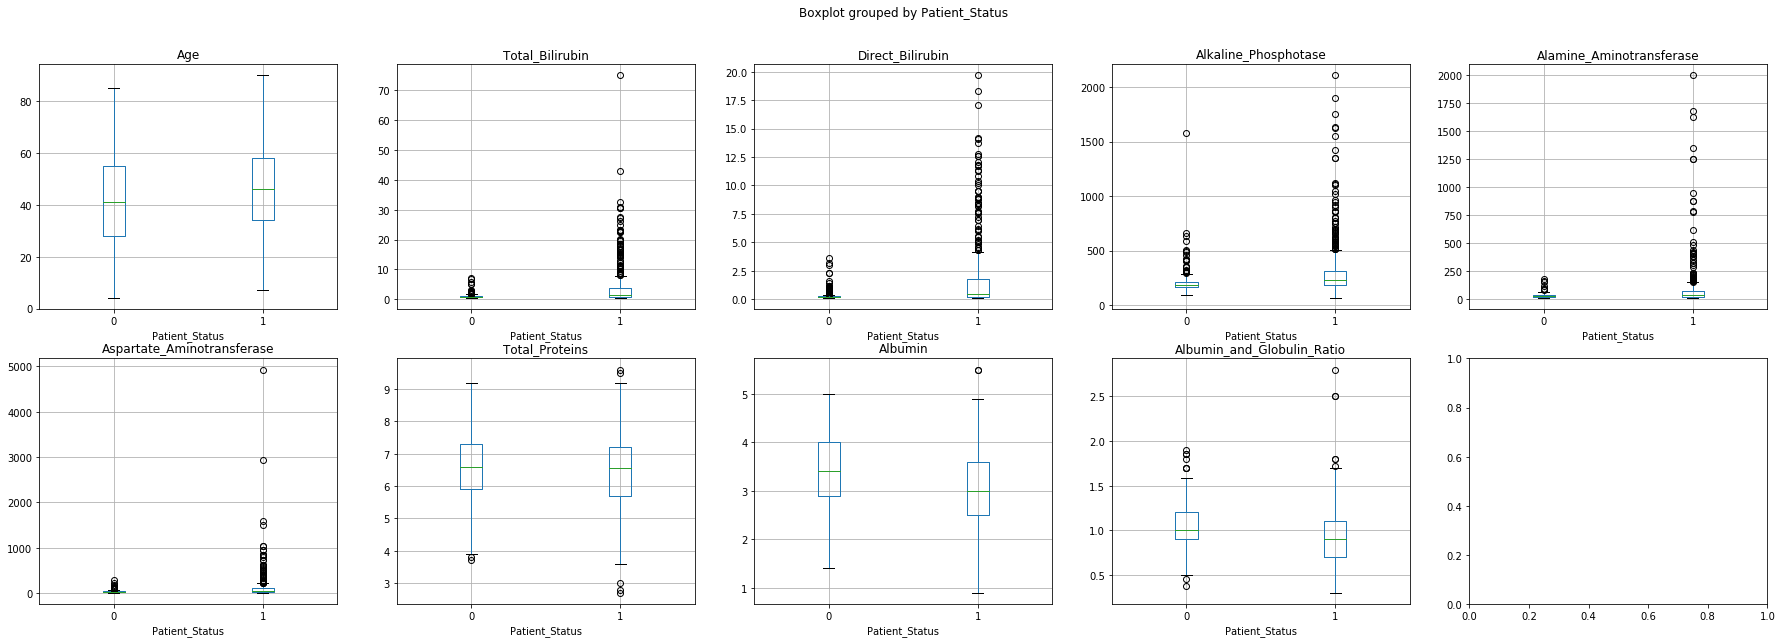

In [12]:
# sns.set(font_scale=1.2) 
# sns.set_style('darkgrid',{'axes.edgecolor': '.9'},)
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(30, 10))
plt.rcParams["patch.force_edgecolor"] = True
cols=['Age','Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase', 'Alamine_Aminotransferase',
      'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin','Albumin_and_Globulin_Ratio']
for i,el in enumerate(cols):
    a = liver_patient_df.boxplot(el, by="Patient_Status", ax=axes.flatten()[i])
# ax1 = axes.boxplot(x = 'Patient_Status', y = 'Aspartate_Aminotransferase', ax = [0,1] ,data = indian_liver_patient_df, palette= 'GnBu_d')

The boxplots above illustrate the values of each variable that we have in our dataset. There is a clear pattern between that can distinguish patients versus non-patients. The chemical compound values(Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphate, Alamine_Aminotransferate, Aspartate_Aminotransferase) of liver disease patients are relatively higher than those who do not have the disease.

Having this understanding will help us further on understanding how to properly handle the features that our models will utilize to help diagnose a patient of having a liver disease.

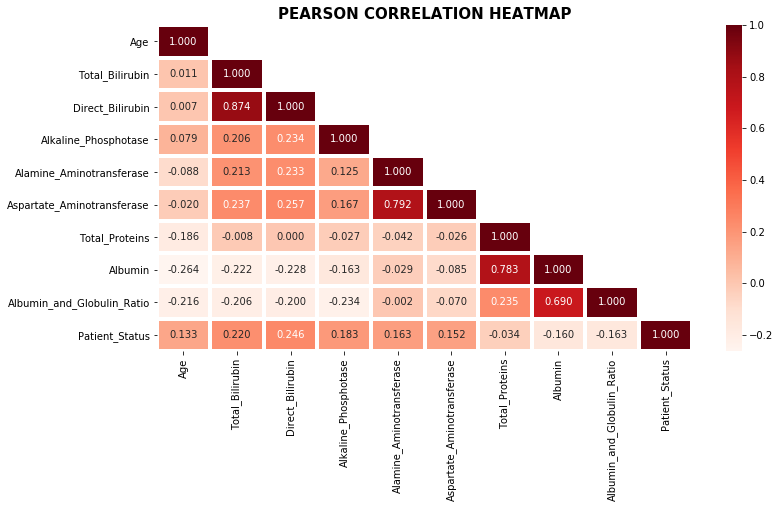

In [13]:
def plotCorrelationHeatmap(data, figsize = (12,6)):
    '''
    This function created the correlation heatmap.

    Args:
        data : The classification model
        figsize : size of the figure(default value = w:12 h:6)
    Returns:
        none
    '''
    plt.figure(figsize=figsize)
    corr_val = data.corr(method = "pearson")
    mask = np.zeros_like(corr_val, dtype = np.bool)
    mask[np.triu_indices_from(mask, k = 1)] = True
    corr_heatmap = sns.heatmap(corr_val, mask = mask,
                               annot = True, fmt='.3f', linewidths = 3, cmap = "Reds")
    corr_heatmap.set_title("PEARSON CORRELATION HEATMAP", fontsize = 15, fontweight = "bold")
    corr_heatmap

plotCorrelationHeatmap(liver_patient_df)

We can see in the heatmap that some of the numerical features have a high correlation with each other such as "Direct_Bilirubin" and "Total_Bilirubin". Having this issue may prompt us to do some feature selection techniques to drop some redundant features possibly.

<h2>Data Preprocessing</h2>

<h4>Feature Engineering</h4>

There are some features in our dataset that are highly correlated to each other.

1. Total_Bilirubin and Direct_Bilirubin
2. Aspartate_Aminotransferate and Alamine_Aminotransferase
3. Albumin and Total Proteins
4. Albumin_and_Globulin_Ratio and Albumin

Total_Bilirubin and Direct_Bilirubin

In [14]:
#Total_Bilirubin and Direct_Bilirubin is linearly correlated with each other. We will perform feature engineering.
#https://synapse.koreamed.org/articles/1108543
liver_patient_df["Bilirubin_Ratio"] = liver_patient_df["Direct_Bilirubin"] / liver_patient_df["Total_Bilirubin"]
liver_patient_df.drop(["Direct_Bilirubin", "Total_Bilirubin"], axis = 1, inplace = True)

Albumin_and_Globulin_Ratio and Albumin
Albumin is part of the Albumin_and_Globulin_Ratio, hence we chose to drop this feature.

In [15]:
liver_patient_df.drop(["Albumin"], axis = 1, inplace = True)

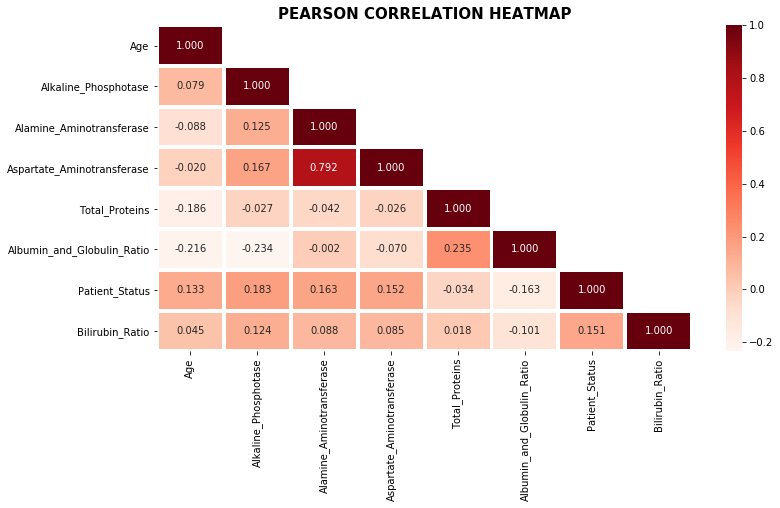

In [16]:
plotCorrelationHeatmap(liver_patient_df)

After doing some feature engineering and dropping columns which exibits "multicollinearity", we were able to remove some high correlation with the features.


### Model Performance Evaluation


Laying what the confusion matrix means for our classifier will help us determine what evaluation metrics are necessary for us to create a system that will help diagnose whether a patient has liver disease.

* True Positive: Patients with liver disease that is predicted to have the disease.
* True Negative: Patients without liver disease that is predicted to have no disease.
* False Positive: Patients without liver disease that is predicted to have the disease.
* False Negative: Patients with liver disease that is predicted to have no disease.


Our dataset is highly imbalanced. The evaluation of the model should rule out the use of accuracy as a sole metric because a high classification accuracy can still be achieved even with high false-positive and negative rates. Given this, we decided to use F1-Score as the primary metric to evaluate our models, a combination of precision and recall.

This project aims to create a system that should only be treated as an aid to medical professionals and should not be the primary tool for deciding a patient's status concerning liver diseases. A classifier with a high false-positive and false-negative rate can still be catastrophic for diagnosis.


* $$ Precision =  \frac{True Positive }{(True Positive + False Positive)}$$

* $$ Recall =  \frac{True Positive }{(True Positive + False Negative)}$$

* $$ F1 =  \frac{2 * (Precision * Recall)}{(Precision + Recall)}$$

Having a high precision value means the desire to lessen the false-positive diagnosis of liver disease to avoid unnecessary medicine recommendation and cost to the patient. On the other hand, high recall is how much we want the classifier to correctly diagnose those with liver disease patients as much as possible. F1 is a combination of precision and recall that will suitably address both of the wanted metrics.

### Split Data for Modelling

The training set with be 80% of the data while the test set will be 20% of the data. In addition to splitting, we will use stratify because our data is imbalanced.

In [17]:
strat_train, strat_test = train_test_split(liver_patient_df,test_size = 0.2, stratify = liver_patient_df['Patient_Status'], random_state = 42)

In [18]:
# Separate the predictors and the labels
X_train = strat_train.drop('Patient_Status', axis=1)
y_train = strat_train[['Patient_Status']].copy()

### Pipeline

We are creating our 'data pipeline' to transform our input features to its appropriate transformations easily


In [19]:
X_train_numerical = X_train.drop("Gender", axis = 1)
X_train_categoral = X_train[["Gender"]]

categorical_attributes = list(X_train_categoral)
for_standard_scaler_transform = ["Age", "Total_Proteins", "Albumin_and_Globulin_Ratio"]
for_robust_scaler_transform = ['Bilirubin_Ratio','Alkaline_Phosphotase', 'Alamine_Aminotransferase','Aspartate_Aminotransferase']

#scalers
ohe = OneHotEncoder()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()


# make single transformer to handle all columns transformation
preprocess = ColumnTransformer([
        ("cat", ohe, categorical_attributes),
        ("stdscaler", standard_scaler,for_standard_scaler_transform),
        ("robustscaler", robust_scaler,for_robust_scaler_transform)
    ])

In [20]:
#fit transform
X_train_transformed = preprocess.fit_transform(X_train)

In [21]:
# test dataset
X_test = strat_test.drop('Patient_Status', axis=1)
y_test = strat_test[['Patient_Status']].copy()

# transfrom test dataset using the pretrained column transformer
X_test_transformed = preprocess.transform(X_test)

### Model Training and Selection

The task involves trying to identify whether a person given its information, and chemical compounds has a probability of exhibiting a liver disease(Patient_status = 1) or not (Patient_Status = 2).

We will use the following classification models.

1. K-Nearest Neighbors
2. Naive Bayes
3. Decision Tree
4. Random Forest
5. XGBoost
6. Voting classifier

In [22]:
# Function for cross validation, using the five measures
def cross_val(model, features, label):
    '''
    This function computes the Average Cross Validation Accuracy, Precision, Recall, F1, and ROC values of a model.

    Args:
        model : The classification model
        features : Transformed predictors 
        label : Target Label, 1(liver disease patient), 2 (not liver disease patient)

    Returns:
        scores (dict): A dictionary of the computed scores
    '''
    accuracy = cross_val_score(model, features, label, cv=10, scoring='accuracy')
    precision = cross_val_score(model, features, label, cv=10, scoring='precision')
    recall = cross_val_score(model, features, label, cv=10, scoring='recall')
    f1 = cross_val_score(model, features, label, cv=10, scoring='f1')
    roc_auc = cross_val_score(model, features, label, cv=10, scoring='roc_auc')

    average_accuracy_test_score = np.mean(accuracy)
    average_precision_test_score = np.mean(precision)
    average_recall_test_score = np.mean(recall)
    average_f1_test_score = np.mean(f1)
    average_roc_auc_score = np.mean(roc_auc)

    scores = {"Cross Val Accuracy":average_accuracy_test_score, "Cross Val Precision":average_precision_test_score, "Cross Val Recall":average_recall_test_score, 
            "Cross Val F1":average_f1_test_score, "Cross Val ROC_AUC":average_roc_auc_score}

    return scores

# Function to measure scores on test dataset
def measure_performance_on_test_dataset(model, test_dataset, test_label, train_dataset, train_label):
    '''
    This function measures the perfomance of the classification model against the test data.

    Args:
        model : The classification model
        test_dataset : the hold out dataset to be predicted bt the model created predicted labels
        test_label : the hold out labels to be compared with the predicted labels to evaluate the model
        train_dataset : the predictors that will be trained on the classification model
        train_label : the label that will be trained on the classification model

    Returns:
        scores (dict): A dictionary of the computed scores
    '''

    model.fit(train_dataset,train_label)
    test_predict = model.predict(test_dataset)

    accuracy = accuracy_score(test_label, test_predict)
    precision = precision_score(test_label,test_predict)
    recall = recall_score(test_label,test_predict)
    f1 = f1_score(test_label,test_predict)
    roc_auc = roc_auc_score(test_label,test_predict)

    scores = {"Test Accuracy":accuracy,"Test Precision":precision,"Test Recall":recall,"Test F1":f1,"Test ROC_AUC":roc_auc}
    
    return scores

#### Experiment 1: Using Split Data Only

In [23]:
# Default Classifiers without hyperparameter tuning
knn_clf = neighbors.KNeighborsClassifier()
NB_clf = GaussianNB()
decision_tree_clf = DecisionTreeClassifier(random_state = 42)
random_forest_clf = RandomForestClassifier(random_state = 42)
xgb_clf = XGBClassifier(random_state=42)

#Voting Classifier
votes = [
    ('knn', knn_clf),
    ('nb', NB_clf),
    ('dt', decision_tree_clf),
    ('rf', random_forest_clf),
    ('xgb', xgb_clf)
    ]

# soft voting based on weights
voting_clf = VotingClassifier(estimators=votes, voting = "soft")

#### Compute the scores for each model

In [24]:
#KNN
knn_clf_cross_val_scores = cross_val(knn_clf,X_train_transformed,y_train)

#Naive Bayes
NB_clf_cross_val_scores = cross_val(NB_clf,X_train_transformed,y_train)

#Decision Tree
decision_tree_clf_val_scores = cross_val(decision_tree_clf,X_train_transformed,y_train)

#Random Forest
random_forest_clf_val_scores = cross_val(random_forest_clf,X_train_transformed,y_train)

#XGB
xgb_clf_val_scores = cross_val(xgb_clf ,X_train_transformed,y_train)

#Voting Classifier
vt_clf_cross_val_scores = cross_val(voting_clf, X_train_transformed, y_train)

Compute Classifier Test Scores

In [25]:
#KNN Scores
knn_clf_test_scores = measure_performance_on_test_dataset(knn_clf,X_test_transformed, y_test, X_train_transformed, y_train)

#KNN Scores
NB_clf_test_scores = measure_performance_on_test_dataset(NB_clf,X_test_transformed, y_test, X_train_transformed, y_train)

#Decision Tree Scores
decision_tree_clf_test_scores = measure_performance_on_test_dataset(decision_tree_clf,X_test_transformed, y_test, X_train_transformed, y_train)

#Random Forest Scores
random_forest_clf_test_scores = measure_performance_on_test_dataset(random_forest_clf,X_test_transformed, y_test, X_train_transformed, y_train)

#XGBoost Scores
xgb_clf_test_scores = measure_performance_on_test_dataset(xgb_clf,X_test_transformed, y_test, X_train_transformed, y_train)

#Voting Classifier Scores
vt_clf_test_score = measure_performance_on_test_dataset(voting_clf,X_test_transformed, y_test, X_train_transformed, y_train)

In [26]:
#create a dataframe of the test scores
cross_val_scores = pd.DataFrame([NB_clf_cross_val_scores,decision_tree_clf_val_scores,knn_clf_cross_val_scores,random_forest_clf_val_scores, xgb_clf_val_scores, vt_clf_cross_val_scores])
ML_list = ["Gaussian Naive Bayes", "Decision Tree", "KNN", "Random Forest", "XGBoost", "Voting Classifier"]
cross_val_scores["ML Model"] = ML_list

test_scores = pd.DataFrame([NB_clf_test_scores,decision_tree_clf_test_scores,knn_clf_test_scores,random_forest_clf_test_scores, xgb_clf_test_scores, vt_clf_test_score])
test_scores["ML Model"] = ML_list

score_df = pd.merge(cross_val_scores, test_scores, on = "ML Model", how = "left")

score_df = score_df[['ML Model', 'Cross Val Accuracy', 'Test Accuracy', 'Cross Val Precision','Test Precision', 
                     'Cross Val Recall','Test Recall', 'Cross Val F1','Test F1', 'Cross Val ROC_AUC', 'Test ROC_AUC'
                     ]].set_index("ML Model")
score_df.round(3)

,Cross Val Accuracy,Test Accuracy,Cross Val Precision,Test Precision,Cross Val Recall,Test Recall,Cross Val F1,Test F1,Cross Val ROC_AUC,Test ROC_AUC
ML Model,,,,,,,,,,
Gaussian Naive Bayes,0.523,0.560,0.946,0.921,0.354,0.422,0.509,0.579,0.715,0.665
Decision Tree,0.637,0.724,0.753,0.800,0.731,0.819,0.740,0.810,0.567,0.652
KNN,0.704,0.698,0.768,0.755,0.843,0.855,0.802,0.802,0.699,0.579
Random Forest,0.717,0.750,0.760,0.760,0.885,0.952,0.817,0.845,0.756,0.597
XGBoost,0.702,0.741,0.771,0.768,0.828,0.916,0.797,0.835,0.725,0.609
Voting Classifier,0.672,0.733,0.783,0.795,0.752,0.843,0.765,0.819,0.730,0.649


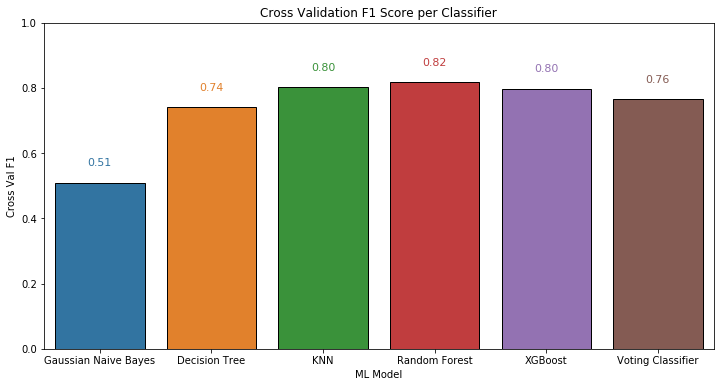

In [27]:
fig, axes = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = score_df.index, y = "Cross Val F1", data = score_df)
ax.set_title("Cross Validation F1 Score per Classifier")

for p in ax.patches:
  ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
      ha='center', va='center', fontsize=11, color=p.get_facecolor(), xytext=(0, 20),
      textcoords='offset points')
_ = ax.set_ylim(0, 1) #To make space for the annotations

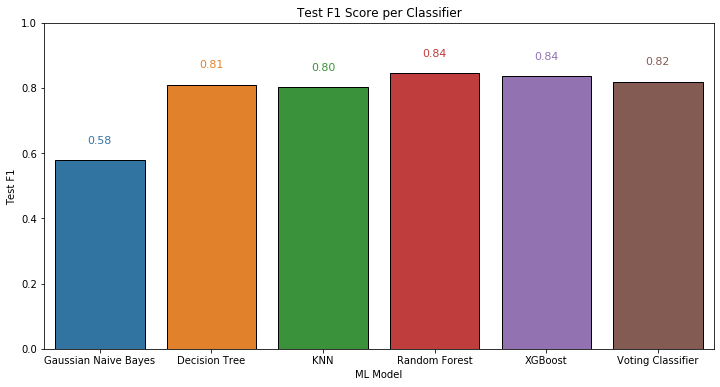

In [28]:
fig, axes = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = score_df.index, y = "Test F1", data = score_df)
ax.set_title("Test F1 Score per Classifier")

for p in ax.patches:
  ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
      ha='center', va='center', fontsize=11, color=p.get_facecolor(), xytext=(0, 20),
      textcoords='offset points')
_ = ax.set_ylim(0, 1) #To make space for the annotations

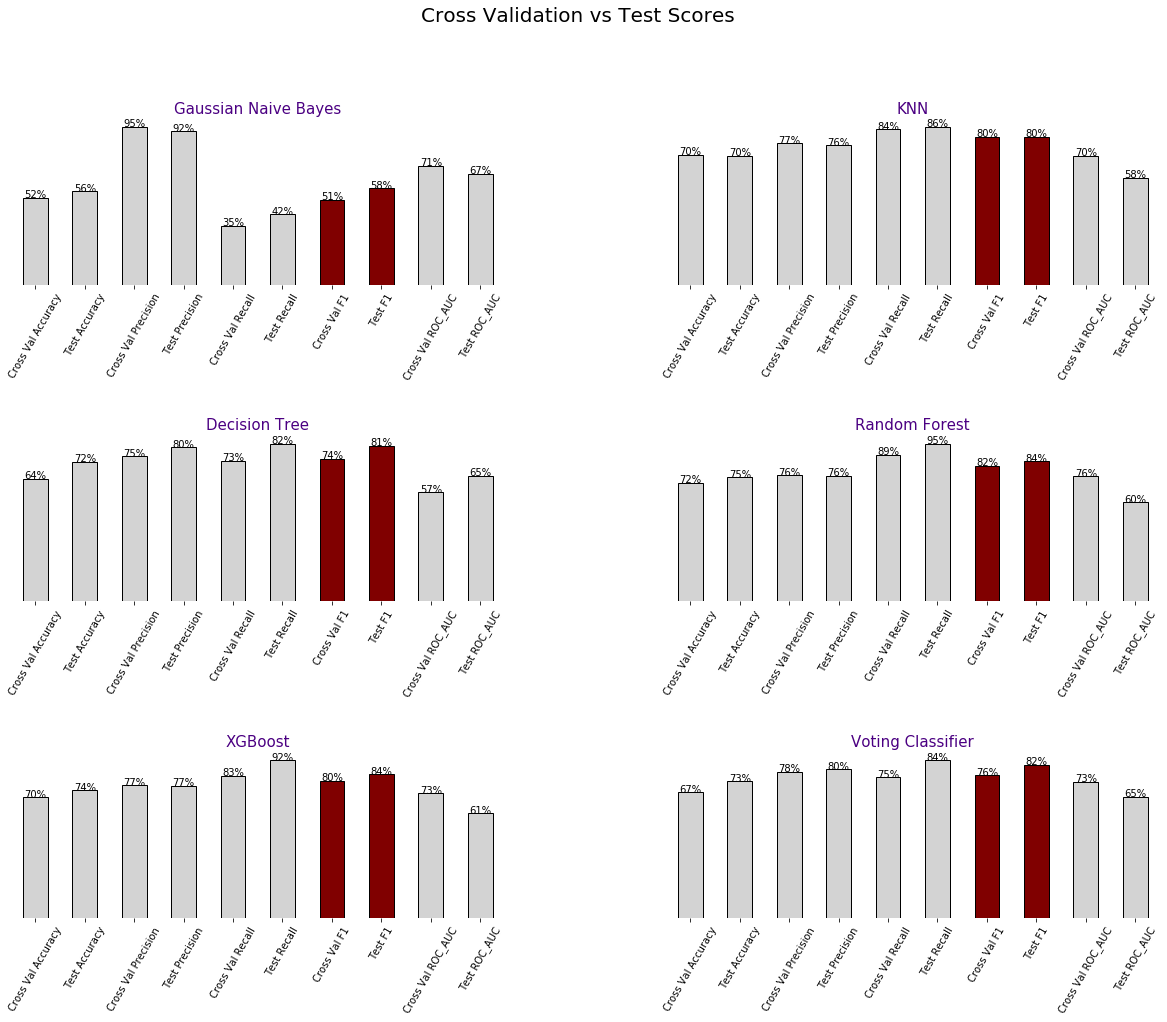

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (20,15))
fig.tight_layout(pad=13.0)

my_colors = ["lightgray","lightgray","lightgray","lightgray","lightgray","lightgray","maroon","maroon","lightgray","lightgray"]
ax1 = score_df.iloc[0,0:].plot(kind='bar', color=my_colors,edgecolor=None, rot = 60,ax=axes[0,0])
ax2 = score_df.iloc[1,0:].plot(kind='bar', color=my_colors,edgecolor=None, rot = 60,ax=axes[1,0])
ax3 = score_df.iloc[2,0:].plot(kind='bar', color=my_colors,edgecolor=None, rot = 60,ax=axes[0,1])
ax4 = score_df.iloc[3,0:].plot(kind='bar', color=my_colors,edgecolor=None, rot = 60,ax=axes[1,1])
ax5 = score_df.iloc[4,0:].plot(kind='bar', color=my_colors,edgecolor=None, rot = 60,ax=axes[2,0])
ax6 = score_df.iloc[5,0:].plot(kind='bar', color=my_colors,edgecolor=None, rot = 60,ax=axes[2,1])


plt.setp(plt.gcf().get_axes(), yticks=[])

ax_list = [ax1,ax2,ax3,ax4,ax5,ax6]

for i in ax_list:
  i.spines['right'].set_visible(False)
  i.spines['top'].set_visible(False)
  i.spines['bottom'].set_visible(False)
  i.spines['left'].set_visible(False)

ax1.set_title("Gaussian Naive Bayes", fontdict  = {'fontsize':15, "color": "indigo"})
ax2.set_title("Decision Tree", fontdict  = {'fontsize':15, "color": "indigo"})
ax3.set_title("KNN", fontdict  = {'fontsize':15, "color": "indigo"})
ax4.set_title("Random Forest", fontdict  = {'fontsize':15 , "color": "indigo"})
ax5.set_title("XGBoost", fontdict  = {'fontsize':15 , "color": "indigo"})
ax6.set_title("Voting Classifier", fontdict  = {'fontsize':15 , "color": "indigo"})
fig.suptitle('Cross Validation vs Test Scores', fontsize=20)

# Add this loop to add the annotations
for p in ax1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax1.annotate(f'{height:.0%}', (x + width/2, y + height), ha='center')

for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.annotate(f'{height:.0%}', (x + width/2, y + height), ha='center')


for p in ax3.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax3.annotate(f'{height:.0%}', (x + width/2, y + height), ha='center')

for p in ax4.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax4.annotate(f'{height:.0%}', (x + width/2, y + height), ha='center')
    
for p in ax5.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax5.annotate(f'{height:.0%}', (x + width/2, y + height), ha='center')

for p in ax6.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax6.annotate(f'{height:.0%}', (x + width/2, y + height), ha='center')

In [30]:
test_score_rank_df = score_df[["Test F1"]].rank(ascending = False)
test_score_rank_df

,Test F1
ML Model,
Gaussian Naive Bayes,6.0
Decision Tree,4.0
KNN,5.0
Random Forest,1.0
XGBoost,2.0
Voting Classifier,3.0


### Model Hyperparameter Tuning
In this section, we will try to tune the parameter of each model and see whether it will improve its perfomance or not.


In [31]:
def gridSearch(model,param_grid,X,y,score_metric):
    '''
    This function allows us to perfom grid search to find the best combination of parameters that yields the best model.

    Args:
        model : The classification model
        param_grid : a dictionary wherein all of the possible parameter combination of the classifier are stored
        X : the training predictors
        y : the training label
        score_metric : the scoring measure where the model will be optimized

    Returns:
        scores (dict): A dictionary of the best model and its parameters
    '''

    grid_search = GridSearchCV(model, param_grid, cv=5,
                           scoring=score_metric,
                           return_train_score=True)
    grid_search.fit(X, y)
  
    return grid_search.best_params_

In [32]:
#KNN Optimization
n_neighbors = list(range(1,15))
p=[1,2]
weights = ['uniform','distance']

knn_param_grid = dict(n_neighbors=n_neighbors, p=p, weights = weights)

knn_best_param = gridSearch(knn_clf,knn_param_grid,X_train_transformed, y_train,'f1')
print(knn_best_param)

knn_optimized = neighbors.KNeighborsClassifier(n_neighbors = knn_best_param['n_neighbors'],p = knn_best_param['p'], weights = knn_best_param['weights'])

#Measure Optimized Model Perfomance on Test Dataset
knn_test_optimized = measure_performance_on_test_dataset(knn_optimized,X_test_transformed, y_test, X_train_transformed, y_train)

{'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


In [33]:
#Decision Tree Optimization
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
max_depth = [1,3,5,7,9,None]
max_features = ["auto", "sqrt", "log2", None]

decision_tree_param_grid  = dict(criterion = criterion, splitter=splitter, max_depth = max_depth, max_features = max_features)
decision_tree_best_param = gridSearch(decision_tree_clf,decision_tree_param_grid,X_train_transformed, y_train,'f1')
print(decision_tree_best_param)

decision_tree_optimized = DecisionTreeClassifier(random_state = 42, criterion = decision_tree_best_param["criterion"],
                                                 splitter=decision_tree_best_param["splitter"], max_depth = decision_tree_best_param["max_depth"], 
                                                 max_features = decision_tree_best_param["max_features"])

#Measure Optimized Model Perfomance on Test Dataset
decision_tree_test_optimized = measure_performance_on_test_dataset(decision_tree_optimized,X_test_transformed, y_test, X_train_transformed, y_train)

{'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'splitter': 'best'}


In [34]:
#Naive Bayes Optimization
naive_bayes_param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
naive_bayes_best_param = gridSearch(NB_clf,naive_bayes_param_grid,X_train_transformed, y_train,'f1')
print(naive_bayes_best_param)

naive_bayes_optimized = GaussianNB( var_smoothing = naive_bayes_best_param["var_smoothing"])

#Measure Optimized Model Perfomance on Test Dataset
naive_bayes_test_optimized = measure_performance_on_test_dataset(naive_bayes_optimized,X_test_transformed, y_test, X_train_transformed, y_train)

{'var_smoothing': 1.0}


In [35]:
#XG Boost Optimization
XG_boost_param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
XG_boost_best_param = gridSearch(xgb_clf,XG_boost_param_grid,X_train_transformed, y_train,'f1')
print(XG_boost_best_param)

XG_boost_optimized = XGBClassifier(random_state=42, min_child_weight = XG_boost_best_param["min_child_weight"], gamma = XG_boost_best_param["gamma"],
                                   subsample = XG_boost_best_param["subsample"], colsample_bytree= XG_boost_best_param["colsample_bytree"], max_depth = XG_boost_best_param["max_depth"])

#Measure Optimized Model Perfomance on Test Dataset
XG_boost_test_optimized = measure_performance_on_test_dataset(XG_boost_optimized,X_test_transformed, y_test, X_train_transformed, y_train)

{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0}


In [36]:
#Random Forest Optimization
bootstrap = [True, False]
max_depth = [1,3,5,7,9,15, None]
max_features = ['auto', 'sqrt']
min_samples_leaf =  [1, 2, 3]
min_samples_split = [1, 2, 3]
n_estimators = [10,50,100]

random_forest_param_grid = dict(bootstrap = bootstrap, max_depth = max_depth, max_features = max_features, 
                                min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split, n_estimators = n_estimators)
random_forest_best_param = gridSearch(random_forest_clf,random_forest_param_grid,X_train_transformed, y_train,'f1')
print(random_forest_best_param)
random_forest_optimized = RandomForestClassifier(random_state = 42, bootstrap = random_forest_best_param["bootstrap"], max_depth = random_forest_best_param["max_depth"], 
                                                 max_features = random_forest_best_param["max_features"],min_samples_leaf = random_forest_best_param["min_samples_leaf"],
                                                 min_samples_split = random_forest_best_param["min_samples_split"], n_estimators = random_forest_best_param["n_estimators"])
random_forest_test_optimized = measure_performance_on_test_dataset(random_forest_optimized,X_test_transformed, y_test, X_train_transformed, y_train)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [37]:
# Voting Classifier
votes_optimized = [
    ('knn_optimized', knn_optimized),
    ('nb_optimized', naive_bayes_optimized),
    ('dt_optimized', decision_tree_optimized),
    ('rf_optimized', random_forest_optimized),
    ('xgb_optimized', XG_boost_optimized)
    ]

# soft voting based on weights
voting_clf_optimized = VotingClassifier(estimators=votes_optimized, voting = "soft")

#Measure Optimized Model Perfomance on Test Dataset
voting_clf_test_optimized = measure_performance_on_test_dataset(voting_clf_optimized,X_test_transformed, y_test, X_train_transformed, y_train)

In [38]:
#Combine scores to a dataframe
test_scores_optimized = pd.DataFrame([naive_bayes_test_optimized, decision_tree_test_optimized, knn_test_optimized,
                                      random_forest_test_optimized,XG_boost_test_optimized, voting_clf_test_optimized])
test_scores_optimized["ML Model"] = ML_list
test_scores_optimized.columns = 	["Test Accuracy Optimized","Test Precision Optimized","Test Recall Optimized",
                                  "Test F1 Optimized","Test ROC_AUC Optimized","ML Model"]
test_optimized_score_df = pd.merge(test_scores_optimized, test_scores, on = "ML Model", how = "left")

test_optimized_score_df = test_optimized_score_df[["ML Model","Test Accuracy","Test Accuracy Optimized","Test Precision","Test Precision Optimized",
                                                   "Test Recall","Test Recall Optimized","Test F1","Test F1 Optimized","Test ROC_AUC","Test ROC_AUC Optimized"]]    
test_optimized_score_df.set_index("ML Model", inplace = True)          
test_optimized_score_df.round(3)

,Test Accuracy,Test Accuracy Optimized,Test Precision,Test Precision Optimized,Test Recall,Test Recall Optimized,Test F1,Test F1 Optimized,Test ROC_AUC,Test ROC_AUC Optimized
ML Model,,,,,,,,,,
Gaussian Naive Bayes,0.560,0.716,0.921,0.834,0.422,0.716,0.579,0.500,0.665,1.000
Decision Tree,0.724,0.716,0.800,0.834,0.819,0.716,0.810,0.500,0.652,1.000
KNN,0.698,0.716,0.755,0.820,0.855,0.750,0.802,0.573,0.579,0.904
Random Forest,0.750,0.716,0.760,0.825,0.952,0.736,0.845,0.546,0.597,0.940
XGBoost,0.741,0.733,0.768,0.841,0.916,0.732,0.835,0.539,0.609,0.988
Voting Classifier,0.733,0.716,0.795,0.832,0.843,0.719,0.819,0.509,0.649,0.988


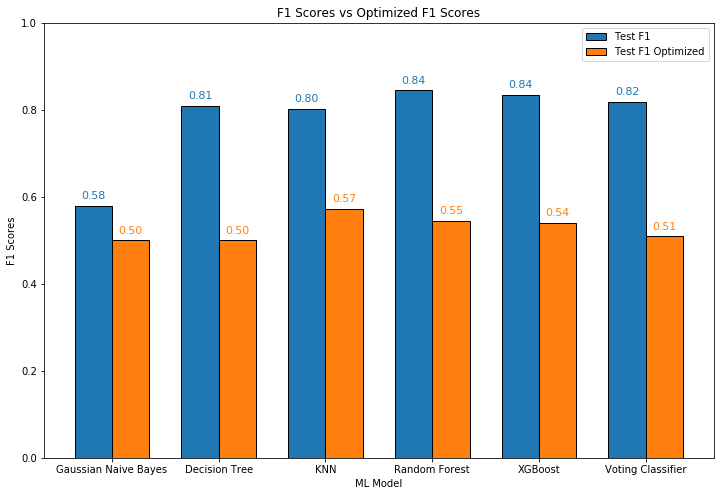

In [39]:
fig, ax = plt.subplots(figsize = (12,8))

x = np.arange(len(test_optimized_score_df.index))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax.bar(x - width / 2, test_optimized_score_df["Test F1"], width, label='Test F1')
rects2 = ax.bar(x + width / 2, test_optimized_score_df["Test F1 Optimized"], width, label='Test F1 Optimized')

ax.set_title('F1 Scores vs Optimized F1 Scores')
ax.set_xticks(x)
ax.set_xticklabels(test_optimized_score_df.index)
ax.set_xlabel("ML Model")
ax.set_ylabel("F1 Scores")
ax.legend()

for p in ax.patches:
  ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
      ha='center', va='center', fontsize=11, color=p.get_facecolor(), xytext=(0, 10),
      textcoords='offset points')
_ = ax.set_ylim(0, 1) #To make space for the annotations

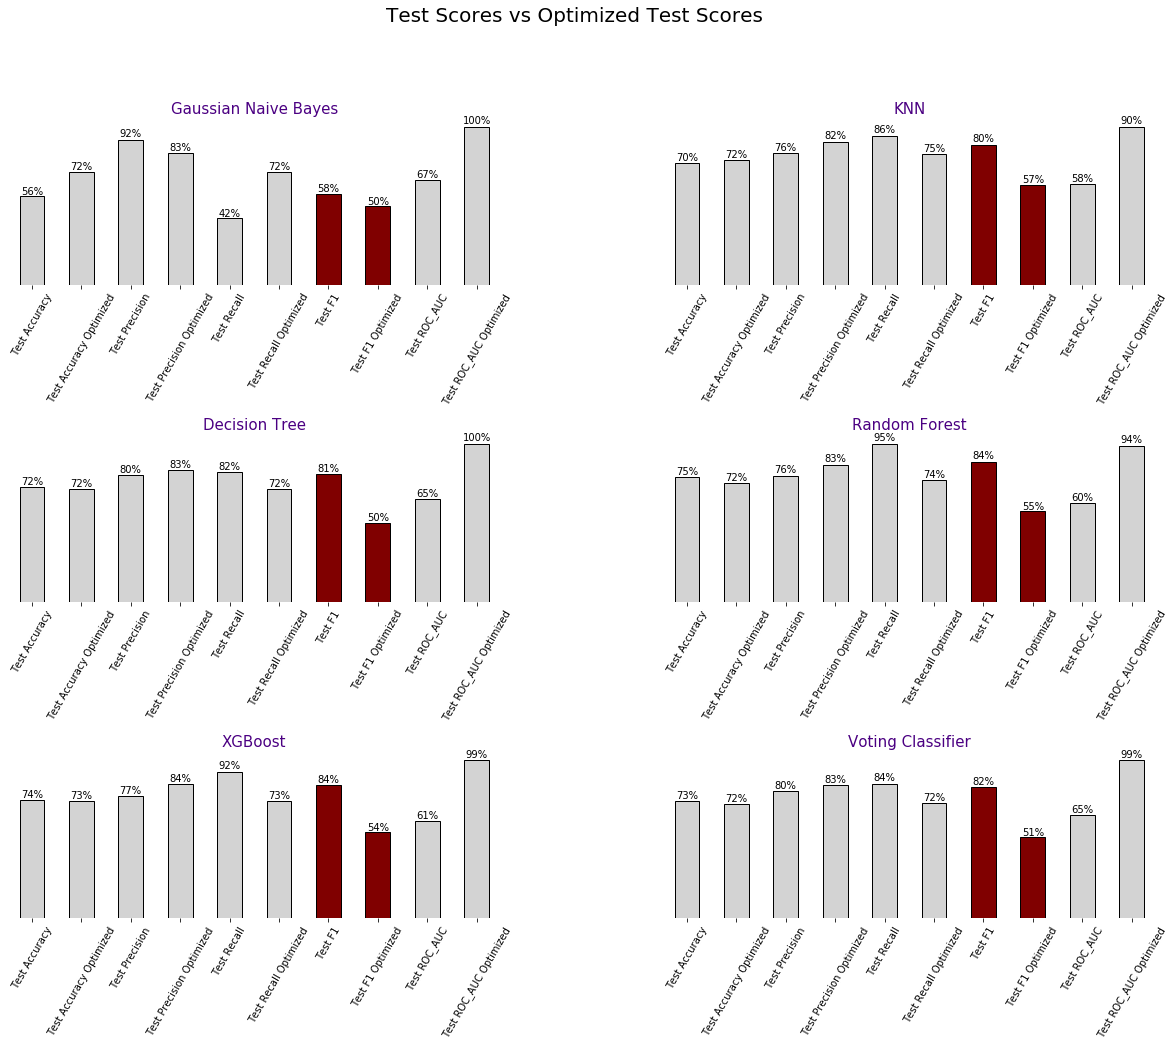

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (20,15))
fig.tight_layout(pad=13.0)

my_colors = ["lightgray","lightgray","lightgray","lightgray","lightgray","lightgray","maroon","maroon","lightgray","lightgray"]
ax1 = test_optimized_score_df.iloc[0,0:].plot(kind='bar', color=my_colors,edgecolor=None, rot = 60,ax=axes[0,0])
ax2 = test_optimized_score_df.iloc[1,0:].plot(kind='bar', color=my_colors,edgecolor=None, rot = 60,ax=axes[1,0])
ax3 = test_optimized_score_df.iloc[2,0:].plot(kind='bar', color=my_colors,edgecolor=None, rot = 60,ax=axes[0,1])
ax4 = test_optimized_score_df.iloc[3,0:].plot(kind='bar', color=my_colors,edgecolor=None, rot = 60,ax=axes[1,1])
ax5 = test_optimized_score_df.iloc[4,0:].plot(kind='bar', color=my_colors,edgecolor=None, rot = 60,ax=axes[2,0])
ax6 = test_optimized_score_df.iloc[5,0:].plot(kind='bar', color=my_colors,edgecolor=None, rot = 60,ax=axes[2,1])


plt.setp(plt.gcf().get_axes(), yticks=[])

ax_list = [ax1,ax2,ax3,ax4,ax5,ax6]

for i in ax_list:
  i.spines['right'].set_visible(False)
  i.spines['top'].set_visible(False)
  i.spines['bottom'].set_visible(False)
  i.spines['left'].set_visible(False)
ax1.set_title("Gaussian Naive Bayes", fontdict  = {'fontsize':15, "color": "indigo"})
ax2.set_title("Decision Tree", fontdict  = {'fontsize':15, "color": "indigo"})
ax3.set_title("KNN", fontdict  = {'fontsize':15, "color": "indigo"})
ax4.set_title("Random Forest", fontdict  = {'fontsize':15 , "color": "indigo"})
ax5.set_title("XGBoost", fontdict  = {'fontsize':15 , "color": "indigo"})
ax6.set_title("Voting Classifier", fontdict  = {'fontsize':15 , "color": "indigo"})
fig.suptitle('Test Scores vs Optimized Test Scores', fontsize=20)

# Add this loop to add the annotations
for p in ax1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax1.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


for p in ax3.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax3.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


for p in ax4.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax4.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
    
for p in ax5.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax5.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

for p in ax6.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax6.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [41]:
test_optimized_rank_df = test_optimized_score_df[["Test F1 Optimized"]].rank(ascending = False)
test_optimized_rank_df

,Test F1 Optimized
ML Model,
Gaussian Naive Bayes,5.5
Decision Tree,5.5
KNN,1.0
Random Forest,2.0
XGBoost,3.0
Voting Classifier,4.0


### Experiment 2: Undersampled Data
Since the data is imbalanced towards patients with liver diseases, we will try to address that issue by undersampling the majority class and seeing whether it will improve our models' performance.

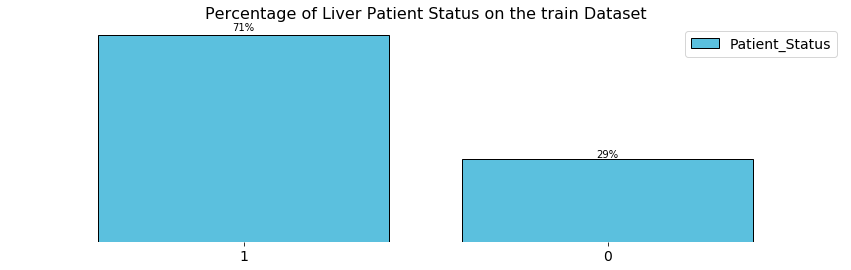

In [42]:
count_df = pd.DataFrame(strat_train.Patient_Status.value_counts())
count_df_pct = pd.DataFrame(count_df["Patient_Status"].div(count_df["Patient_Status"].sum(), axis=0))

colors_list = ['#5bc0de']

ax = count_df_pct.plot(kind='bar',figsize=(15,4), width = 0.8, color = colors_list, edgecolor=None, rot = 0 )
plt.legend(labels=count_df_pct.columns,fontsize= 14)
plt.title("Percentage of Liver Patient Status on the train Dataset",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [43]:
rus = RandomUnderSampler(replacement=False)
X_train_subsample, y_train_subsample = rus.fit_sample(X_train, y_train)

print("Retained portion of dataset after downsampling : %f"%(X_train_subsample.shape[0]/X_train.shape[0] * 100))

Retained portion of dataset after downsampling : 57.019438


In [44]:
X_train_subsample_df = pd.DataFrame(X_train_subsample)
X_train_subsample_df.columns = X_train.columns.tolist()
# X_train_subsample_df.drop("Patient_Status",axis = 1, inplace = True)
# X_train_subsample_df

In [45]:
X_train_numerical_undersampled = X_train_subsample_df.drop("Gender", axis = 1)
X_train_categoral_undersampled = X_train_subsample_df[["Gender"]]
categorical_attributes = list(X_train_categoral)
for_standard_scaler_transform = ["Age", "Total_Proteins", "Albumin_and_Globulin_Ratio"]
for_robust_scaler_transform = ['Bilirubin_Ratio','Alkaline_Phosphotase', 'Alamine_Aminotransferase','Aspartate_Aminotransferase']

#scalers
ohe = OneHotEncoder()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()


# make single transformer to handle all columns transformation
preprocess_undersampled_dataset = ColumnTransformer([
        ("cat", ohe, categorical_attributes),
        ("stdscaler", standard_scaler,for_standard_scaler_transform),
        ("robustscaler", robust_scaler,for_robust_scaler_transform)
    ])

In [46]:
X_train_transformed_undersampled = preprocess_undersampled_dataset.fit_transform(X_train_subsample_df)

# transfrom test dataset using the pretrained column transformer
X_test_transformed = preprocess_undersampled_dataset.transform(X_test)

Compute Undersampled Classifier Scores


In [47]:
#KNN Undersampled Scores
knn_clf_test_scores_undersampled = measure_performance_on_test_dataset(knn_clf,X_test_transformed, y_test, X_train_transformed, y_train)

#Naive Bayes Undersampled Scores
NB_clf_test_scores_undersampled = measure_performance_on_test_dataset(NB_clf,X_test_transformed, y_test, X_train_transformed, y_train)

#Decision Tree Undersampled Scores
decision_tree_clf_test_scores_undersampled = measure_performance_on_test_dataset(decision_tree_clf,X_test_transformed, y_test, X_train_transformed, y_train)

#Random Forest Undersampled Scores
random_forest_clf_test_scores_undersampled = measure_performance_on_test_dataset(random_forest_clf,X_test_transformed, y_test, X_train_transformed, y_train)

#XGBoost Undersampled Scores
xgb_clf_test_scores_undersampled = measure_performance_on_test_dataset(xgb_clf,X_test_transformed, y_test, X_train_transformed, y_train)

#Voting Classifier Undersampled Scores
vt_clf_test_score_undersampled = measure_performance_on_test_dataset(voting_clf,X_test_transformed, y_test, X_train_transformed, y_train)

In [48]:
#Create a dataframe of all the scores
test_scores_undersampled = pd.DataFrame([NB_clf_test_scores_undersampled,decision_tree_clf_test_scores_undersampled,
                                              knn_clf_test_scores_undersampled,random_forest_clf_test_scores_undersampled,
                                              xgb_clf_test_scores_undersampled,vt_clf_test_score_undersampled])

test_scores_undersampled.columns = ["Test Accuracy Undersampled",	"Test Precision Undersampled",	"Test Recall Undersampled",	"Test F1 Undersampled",	"Test ROC_AUC Undersampled"]
test_scores_undersampled["ML Model"] = ML_list

test_Undersampled_score_df = pd.merge(test_scores_undersampled, test_scores, on = "ML Model", how = "left")

test_Undersampled_score_df = test_Undersampled_score_df[["ML Model","Test Accuracy","Test Accuracy Undersampled","Test Precision","Test Precision Undersampled",
                                                   "Test Recall","Test Recall Undersampled","Test F1","Test F1 Undersampled","Test ROC_AUC","Test ROC_AUC Undersampled"]]    
test_Undersampled_score_df.set_index("ML Model", inplace = True)          
test_Undersampled_score_df.round(3)

,Test Accuracy,Test Accuracy Undersampled,Test Precision,Test Precision Undersampled,Test Recall,Test Recall Undersampled,Test F1,Test F1 Undersampled,Test ROC_AUC,Test ROC_AUC Undersampled
ML Model,,,,,,,,,,
Gaussian Naive Bayes,0.560,0.638,0.921,0.677,0.422,0.936,0.579,0.720,0.665,0.530
Decision Tree,0.724,0.672,0.800,0.774,0.819,0.765,0.810,0.589,0.652,0.783
KNN,0.698,0.707,0.755,0.813,0.855,0.747,0.802,0.567,0.579,0.892
Random Forest,0.750,0.733,0.760,0.838,0.952,0.741,0.845,0.558,0.597,0.964
XGBoost,0.741,0.698,0.768,0.811,0.916,0.735,0.835,0.543,0.609,0.904
Voting Classifier,0.733,0.698,0.795,0.802,0.843,0.755,0.819,0.579,0.649,0.855


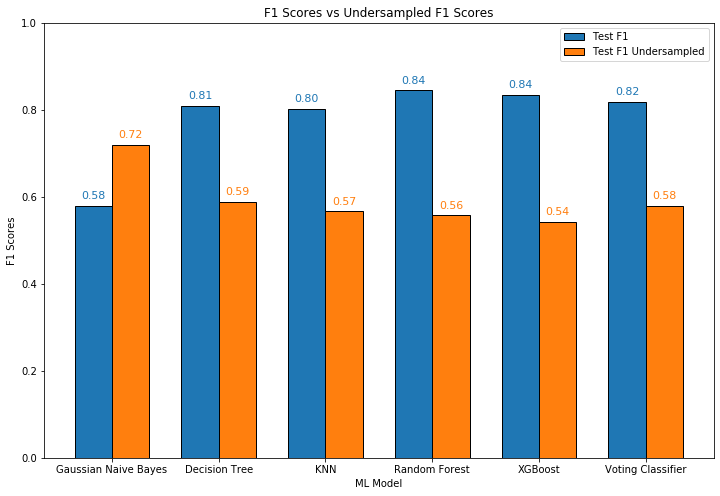

In [49]:
fig, ax = plt.subplots(figsize = (12,8))

x = np.arange(len(test_Undersampled_score_df.index))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax.bar(x - width / 2, test_Undersampled_score_df["Test F1"], width, label='Test F1')
#rects2 = ax.bar(x + width / 2, test_optimized_score_df["Test F1 Optimized"], width, label='Test F1 Optimized')
rects3 = ax.bar(x + width / 2, test_Undersampled_score_df["Test F1 Undersampled"], width, label='Test F1 Undersampled')

ax.set_title('F1 Scores vs Undersampled F1 Scores')
ax.set_xticks(x)
ax.set_xticklabels(test_Undersampled_score_df.index)
ax.set_xlabel("ML Model")
ax.set_ylabel("F1 Scores")
ax.legend()

for p in ax.patches:
  ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
      ha='center', va='center', fontsize=11, color=p.get_facecolor(), xytext=(0, 10),
      textcoords='offset points')
_ = ax.set_ylim(0, 1) #To make space for the annotations

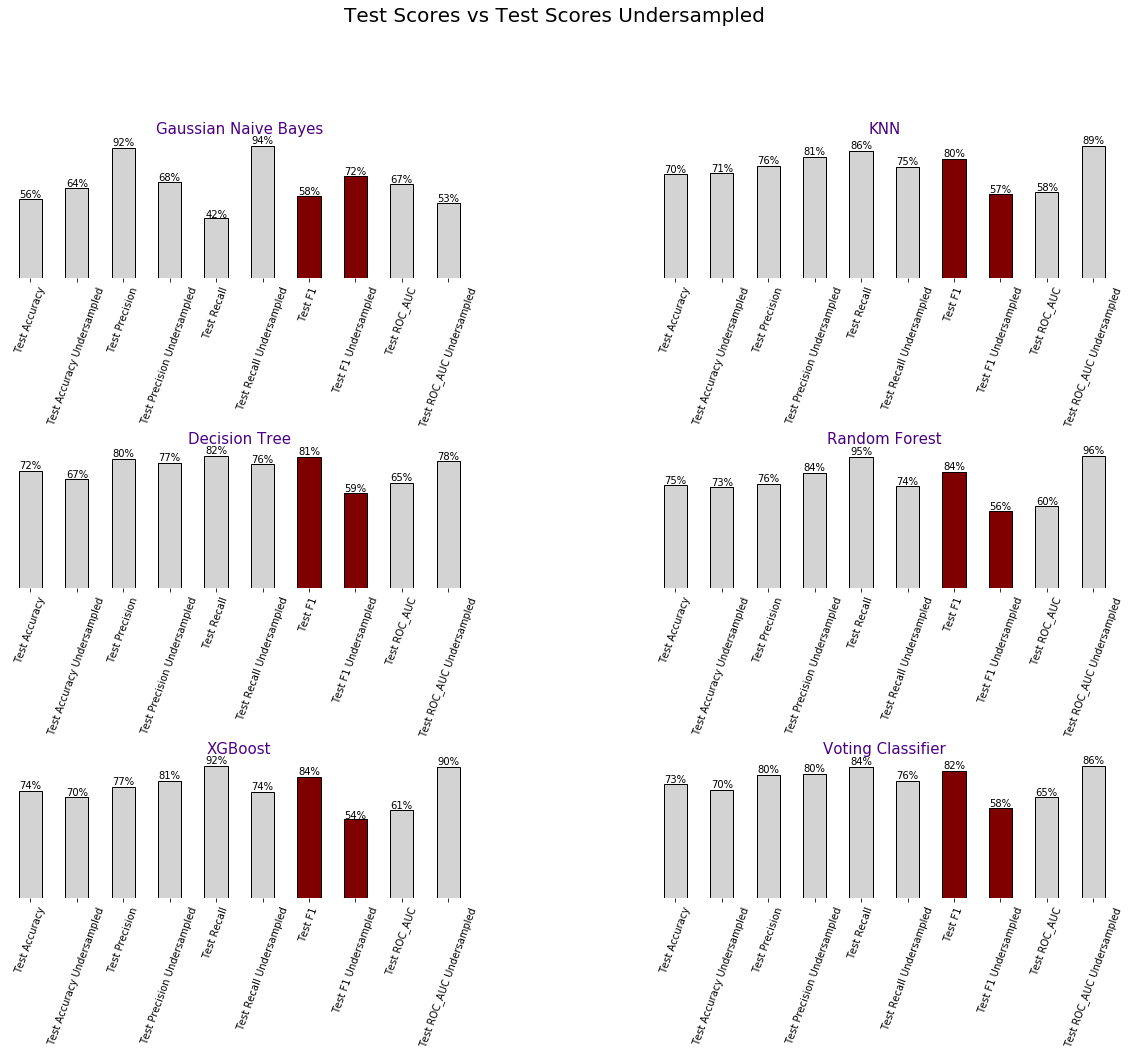

In [50]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (20,15))
fig.tight_layout(pad=15.0)

my_colors = ["lightgray","lightgray","lightgray","lightgray","lightgray","lightgray","maroon","maroon","lightgray","lightgray"]
ax1 = test_Undersampled_score_df.iloc[0,0:].plot(kind='bar', color=my_colors,edgecolor=None, rot = 70,ax=axes[0,0])
ax2 = test_Undersampled_score_df.iloc[1,0:].plot(kind='bar', color=my_colors,edgecolor=None, rot = 70,ax=axes[1,0])
ax3 = test_Undersampled_score_df.iloc[2,0:].plot(kind='bar', color=my_colors,edgecolor=None, rot = 70,ax=axes[0,1])
ax4 = test_Undersampled_score_df.iloc[3,0:].plot(kind='bar', color=my_colors,edgecolor=None, rot = 70,ax=axes[1,1])
ax5 = test_Undersampled_score_df.iloc[4,0:].plot(kind='bar', color=my_colors,edgecolor=None, rot = 70,ax=axes[2,0])
ax6 = test_Undersampled_score_df.iloc[5,0:].plot(kind='bar', color=my_colors,edgecolor=None, rot = 70,ax=axes[2,1])


plt.setp(plt.gcf().get_axes(), yticks=[])

ax_list = [ax1,ax2,ax3,ax4,ax5,ax6]

for i in ax_list:
  i.spines['right'].set_visible(False)
  i.spines['top'].set_visible(False)
  i.spines['bottom'].set_visible(False)
  i.spines['left'].set_visible(False)
  
ax1.set_title("Gaussian Naive Bayes", fontdict  = {'fontsize':15, "color": "indigo"})
ax2.set_title("Decision Tree", fontdict  = {'fontsize':15, "color": "indigo"})
ax3.set_title("KNN", fontdict  = {'fontsize':15, "color": "indigo"})
ax4.set_title("Random Forest", fontdict  = {'fontsize':15 , "color": "indigo"})
ax5.set_title("XGBoost", fontdict  = {'fontsize':15 , "color": "indigo"})
ax6.set_title("Voting Classifier", fontdict  = {'fontsize':15 , "color": "indigo"})
fig.suptitle('Test Scores vs Test Scores Undersampled', fontsize=20)

# Add this loop to add the annotations
for p in ax1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax1.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


for p in ax3.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax3.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


for p in ax4.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax4.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
    
for p in ax5.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax5.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

for p in ax6.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax6.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Future Work

*Feature Improvements, Selection, and Elimination*

Due to the data limitation that we have, having additional features would greatly increase  our model's performance.

*Predict Probablity of having the disease*

In addition to predict whether a person is sick or not. It would be good to include models that gives the probability(%) or having liver disease.

### Conclusion

"Health is wealth", a famous saying that explains how important our health is. The goal of this project is to utilize technology using Machine Learning algorithm in helping to diagnose whether a person is having liver disease or not given its information.

After doing experiments with insufficient and imbalanced dataset, we found how important it is to understand some techniques to handle these kinds of problems. For example, stratification and proper use of scalers helped us achieve a model that does not overfit or underfit.

The model that has the highest F1 score is Voting Classifier with having 85%. With this model, we can help our medical practitioners in diagnosing various liver diseases such as Hepatitis B or C. But keep in mind that result of this project does not aim to replace a proper diagnosis of medical professionals. 

#### References

1. Indian Liver Patient Records. (2020). Retrieved 16 July 2020, from https://www.kaggle.com/uciml/indian-liver-patient-records
2. Liver disease is now the biggest cause of death in those aged between 35-49 years old, new report reveals. (2019, August 21). Retrieved July 16, 2020, from https://britishlivertrust.org.uk/liver-disease-is-now-the-biggest-cause-of-death-in-those-aged-between-35-49-years-old-new-report-reveals/
3. Holland, K. (2020). 12 Leading Causes of Death in the United States. Retrieved 16 July 2020, from https://www.healthline.com/health/leading-causes-of-death#heart-disease
4. "Accuracy, Precision, Recall or F1?", Medium, 2020. [Online]. Available: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. [Accessed: 27- Aug- 2020].
